### Modelos baseados em árvores

#### Importando as bibliotecas

In [1]:
import pandas as pd                      
import matplotlib.pyplot as plt          
import seaborn as sns                    
import numpy as np                        

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

#### Carregando os dados

In [2]:
dados = pd.read_csv(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\card_transdata.csv', sep=',')

In [3]:
dados.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


#### Limpeza dos dados

In [4]:
dados.isnull().sum().sum()

0

In [5]:
dados.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

#### Análise exploratória

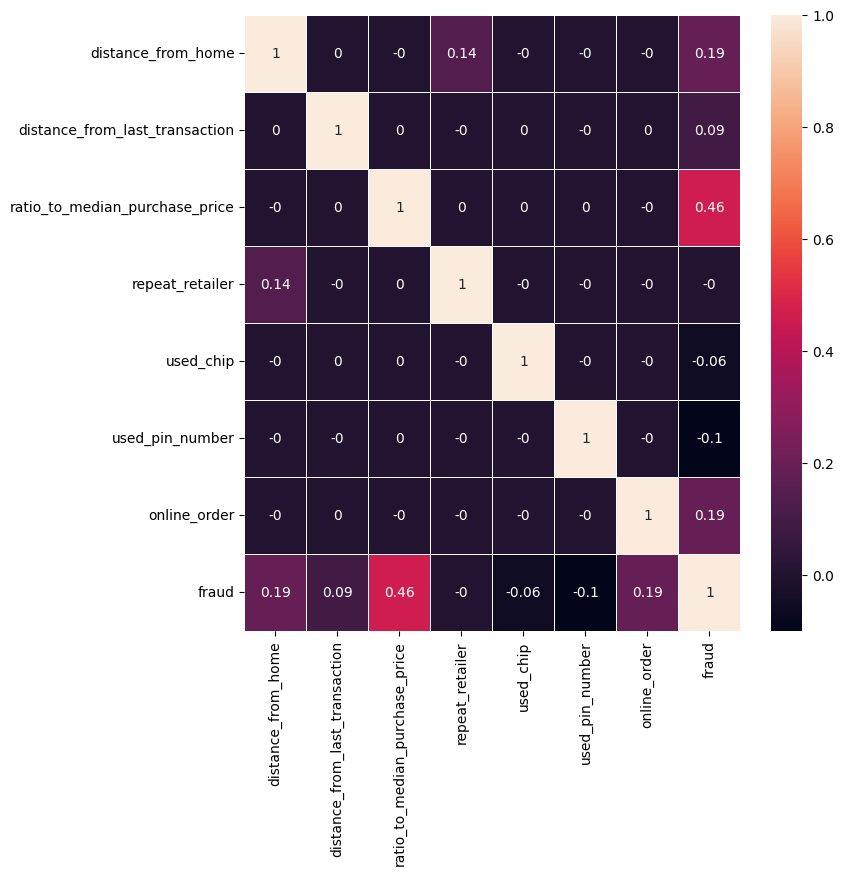

In [6]:
# analisando correlação
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

Analisando a correlação entre ratio_to_median_purchase_price e fraud

#### Criando os modelos

##### Decision Tree

In [7]:
# separando os dados
x = dados.drop('fraud', axis=1)
y = dados['fraud'] # Target

# separando em base de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [8]:
# instanciando o modelo
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth=2)

In [9]:
# treinando o modelo
y_pred = dt.fit(x_train, y_train).predict(x_test)

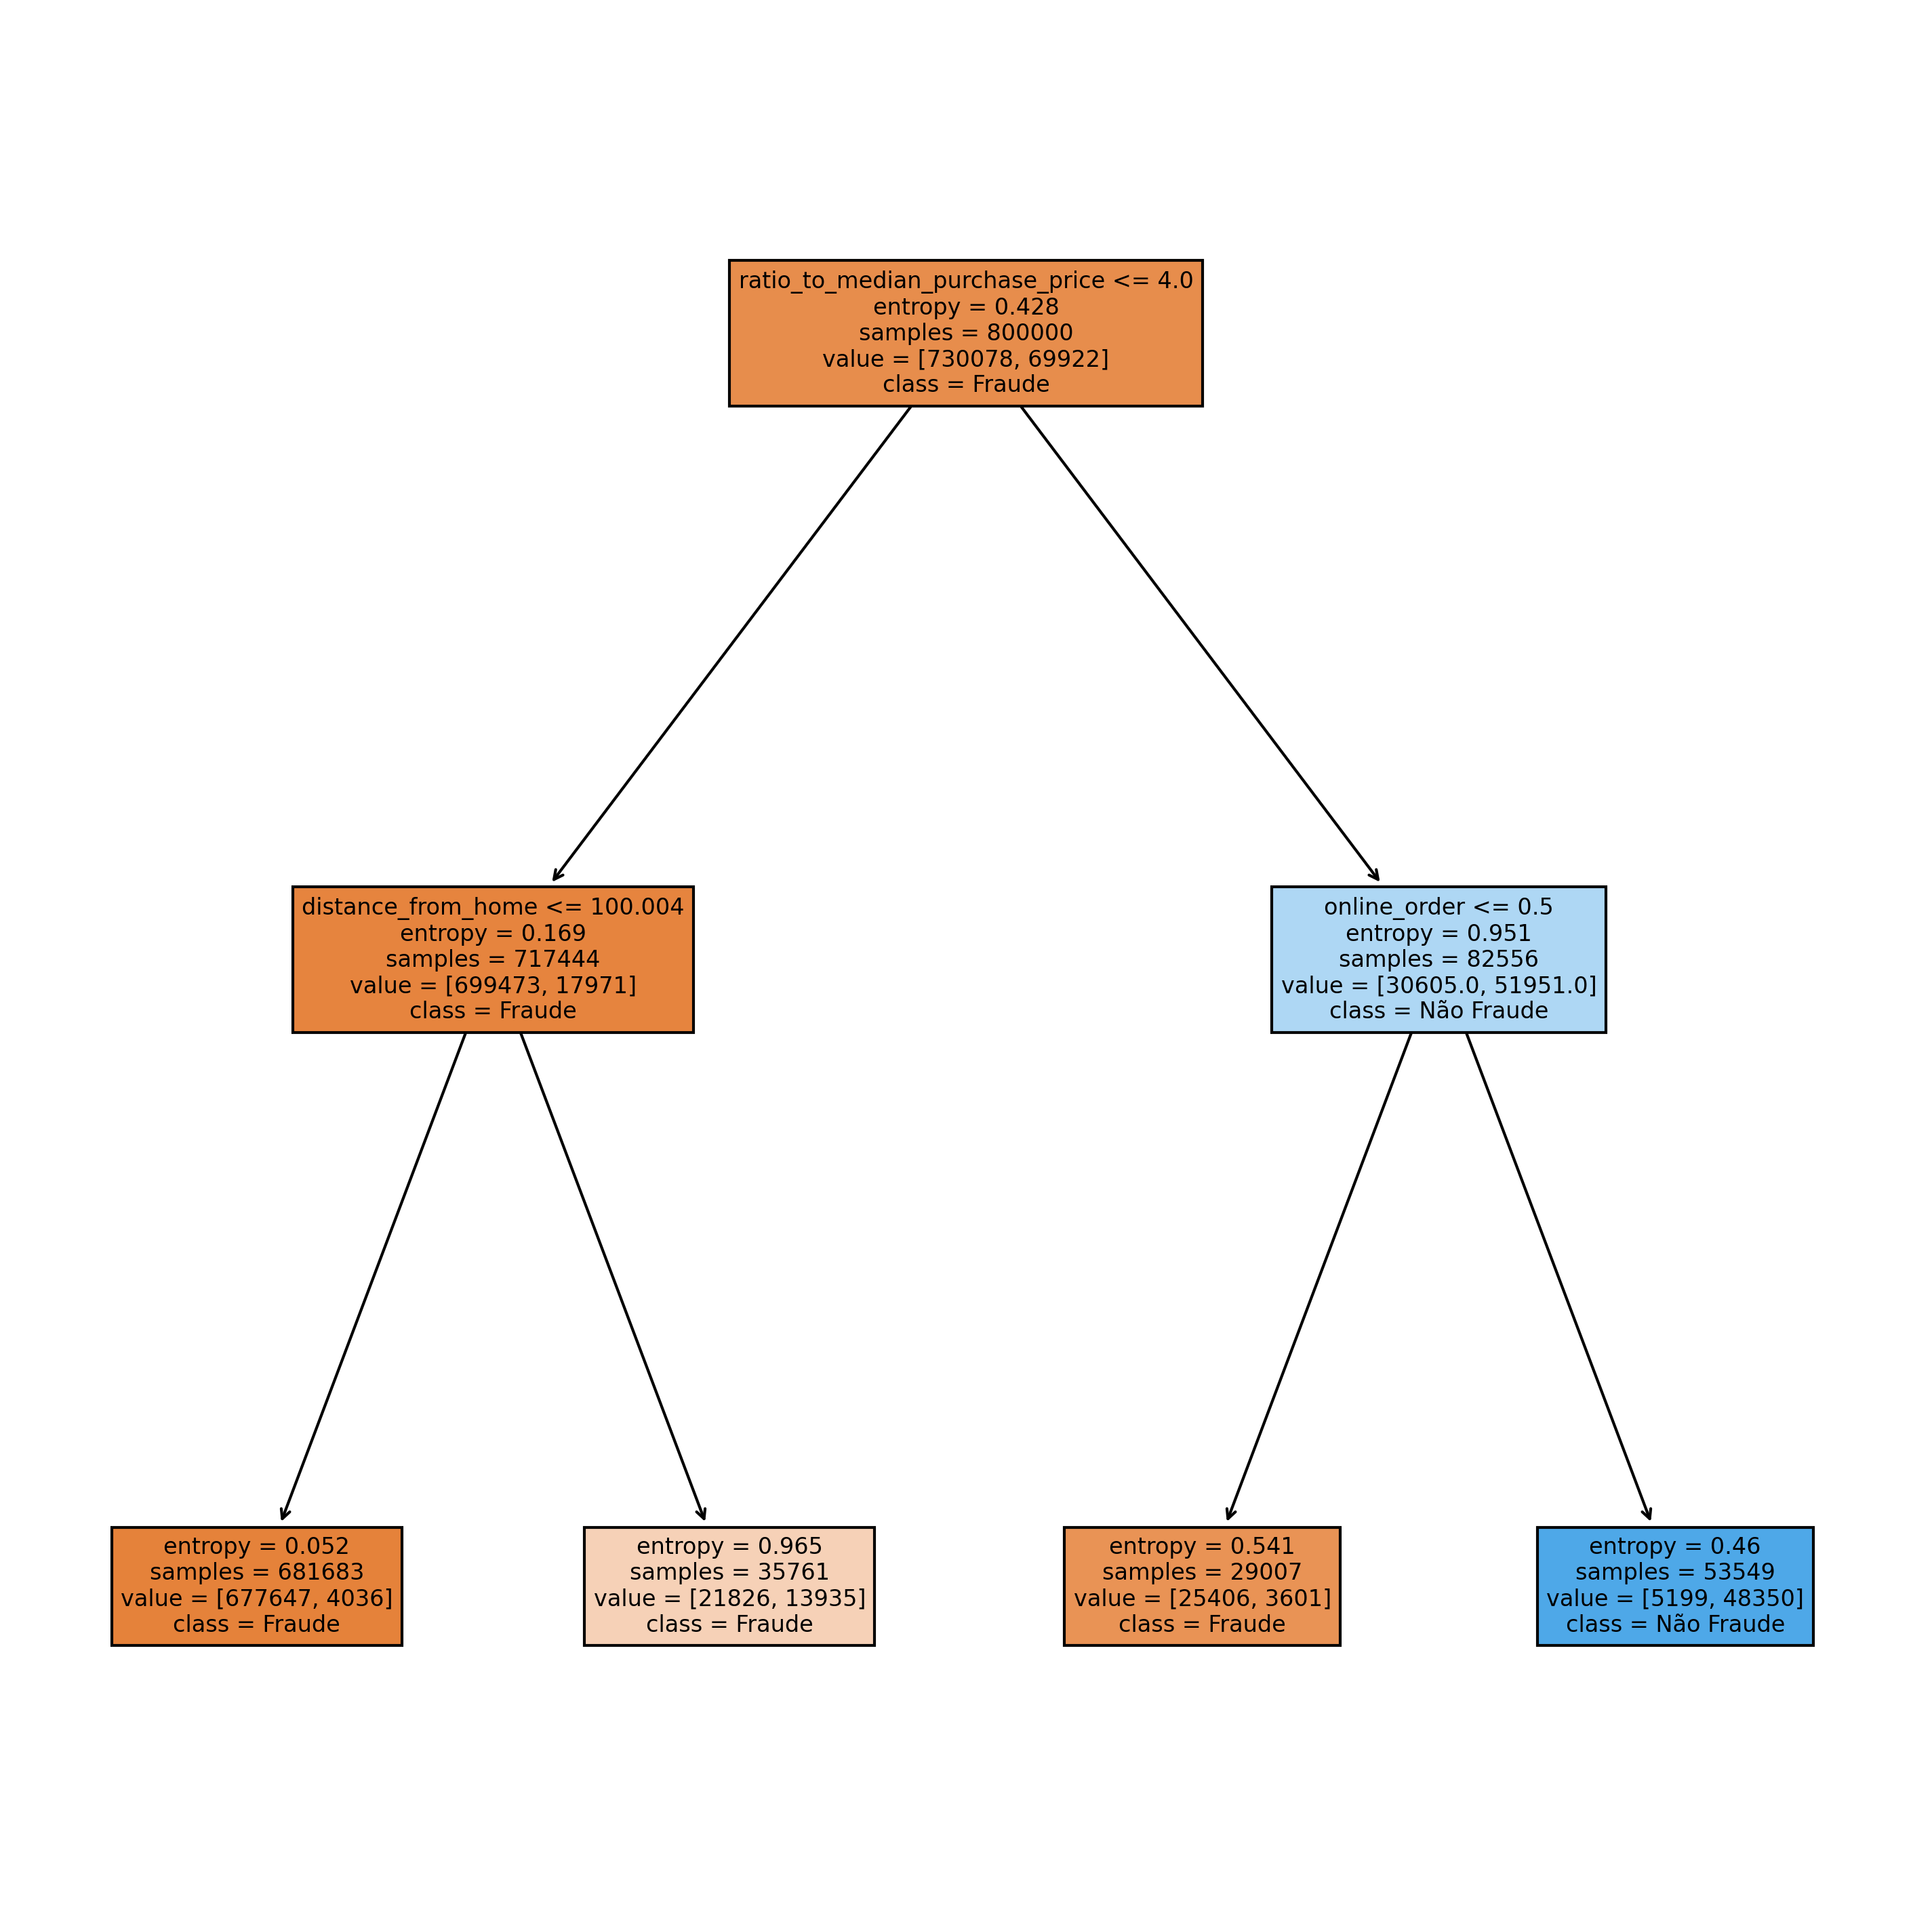

In [11]:
class_names = ['Fraude', 'Não Fraude']
labels_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

fig, ax = plt.subplots(figsize=(12, 12), dpi=300)

tree.plot_tree(dt, feature_names=labels_names, class_names=class_names, filled=True, ax=ax)

fig.savefig(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\image_tree.png')

In [12]:
# Acuracia do modelo
print(accuracy_score(y_test, y_pred))

0.96675


##### Random Forest

In [13]:
# instanciando o modelo
rf = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=7)

# treinando o modelo
rf.fit(x_train, y_train)

# guardando todas as arvores
estimator = rf.estimators_

In [14]:
# predizendo
y_pred_rf = rf.predict(x_test)

In [15]:
# acuracia do modelo
print(accuracy_score(y_test, y_pred_rf))

0.95339


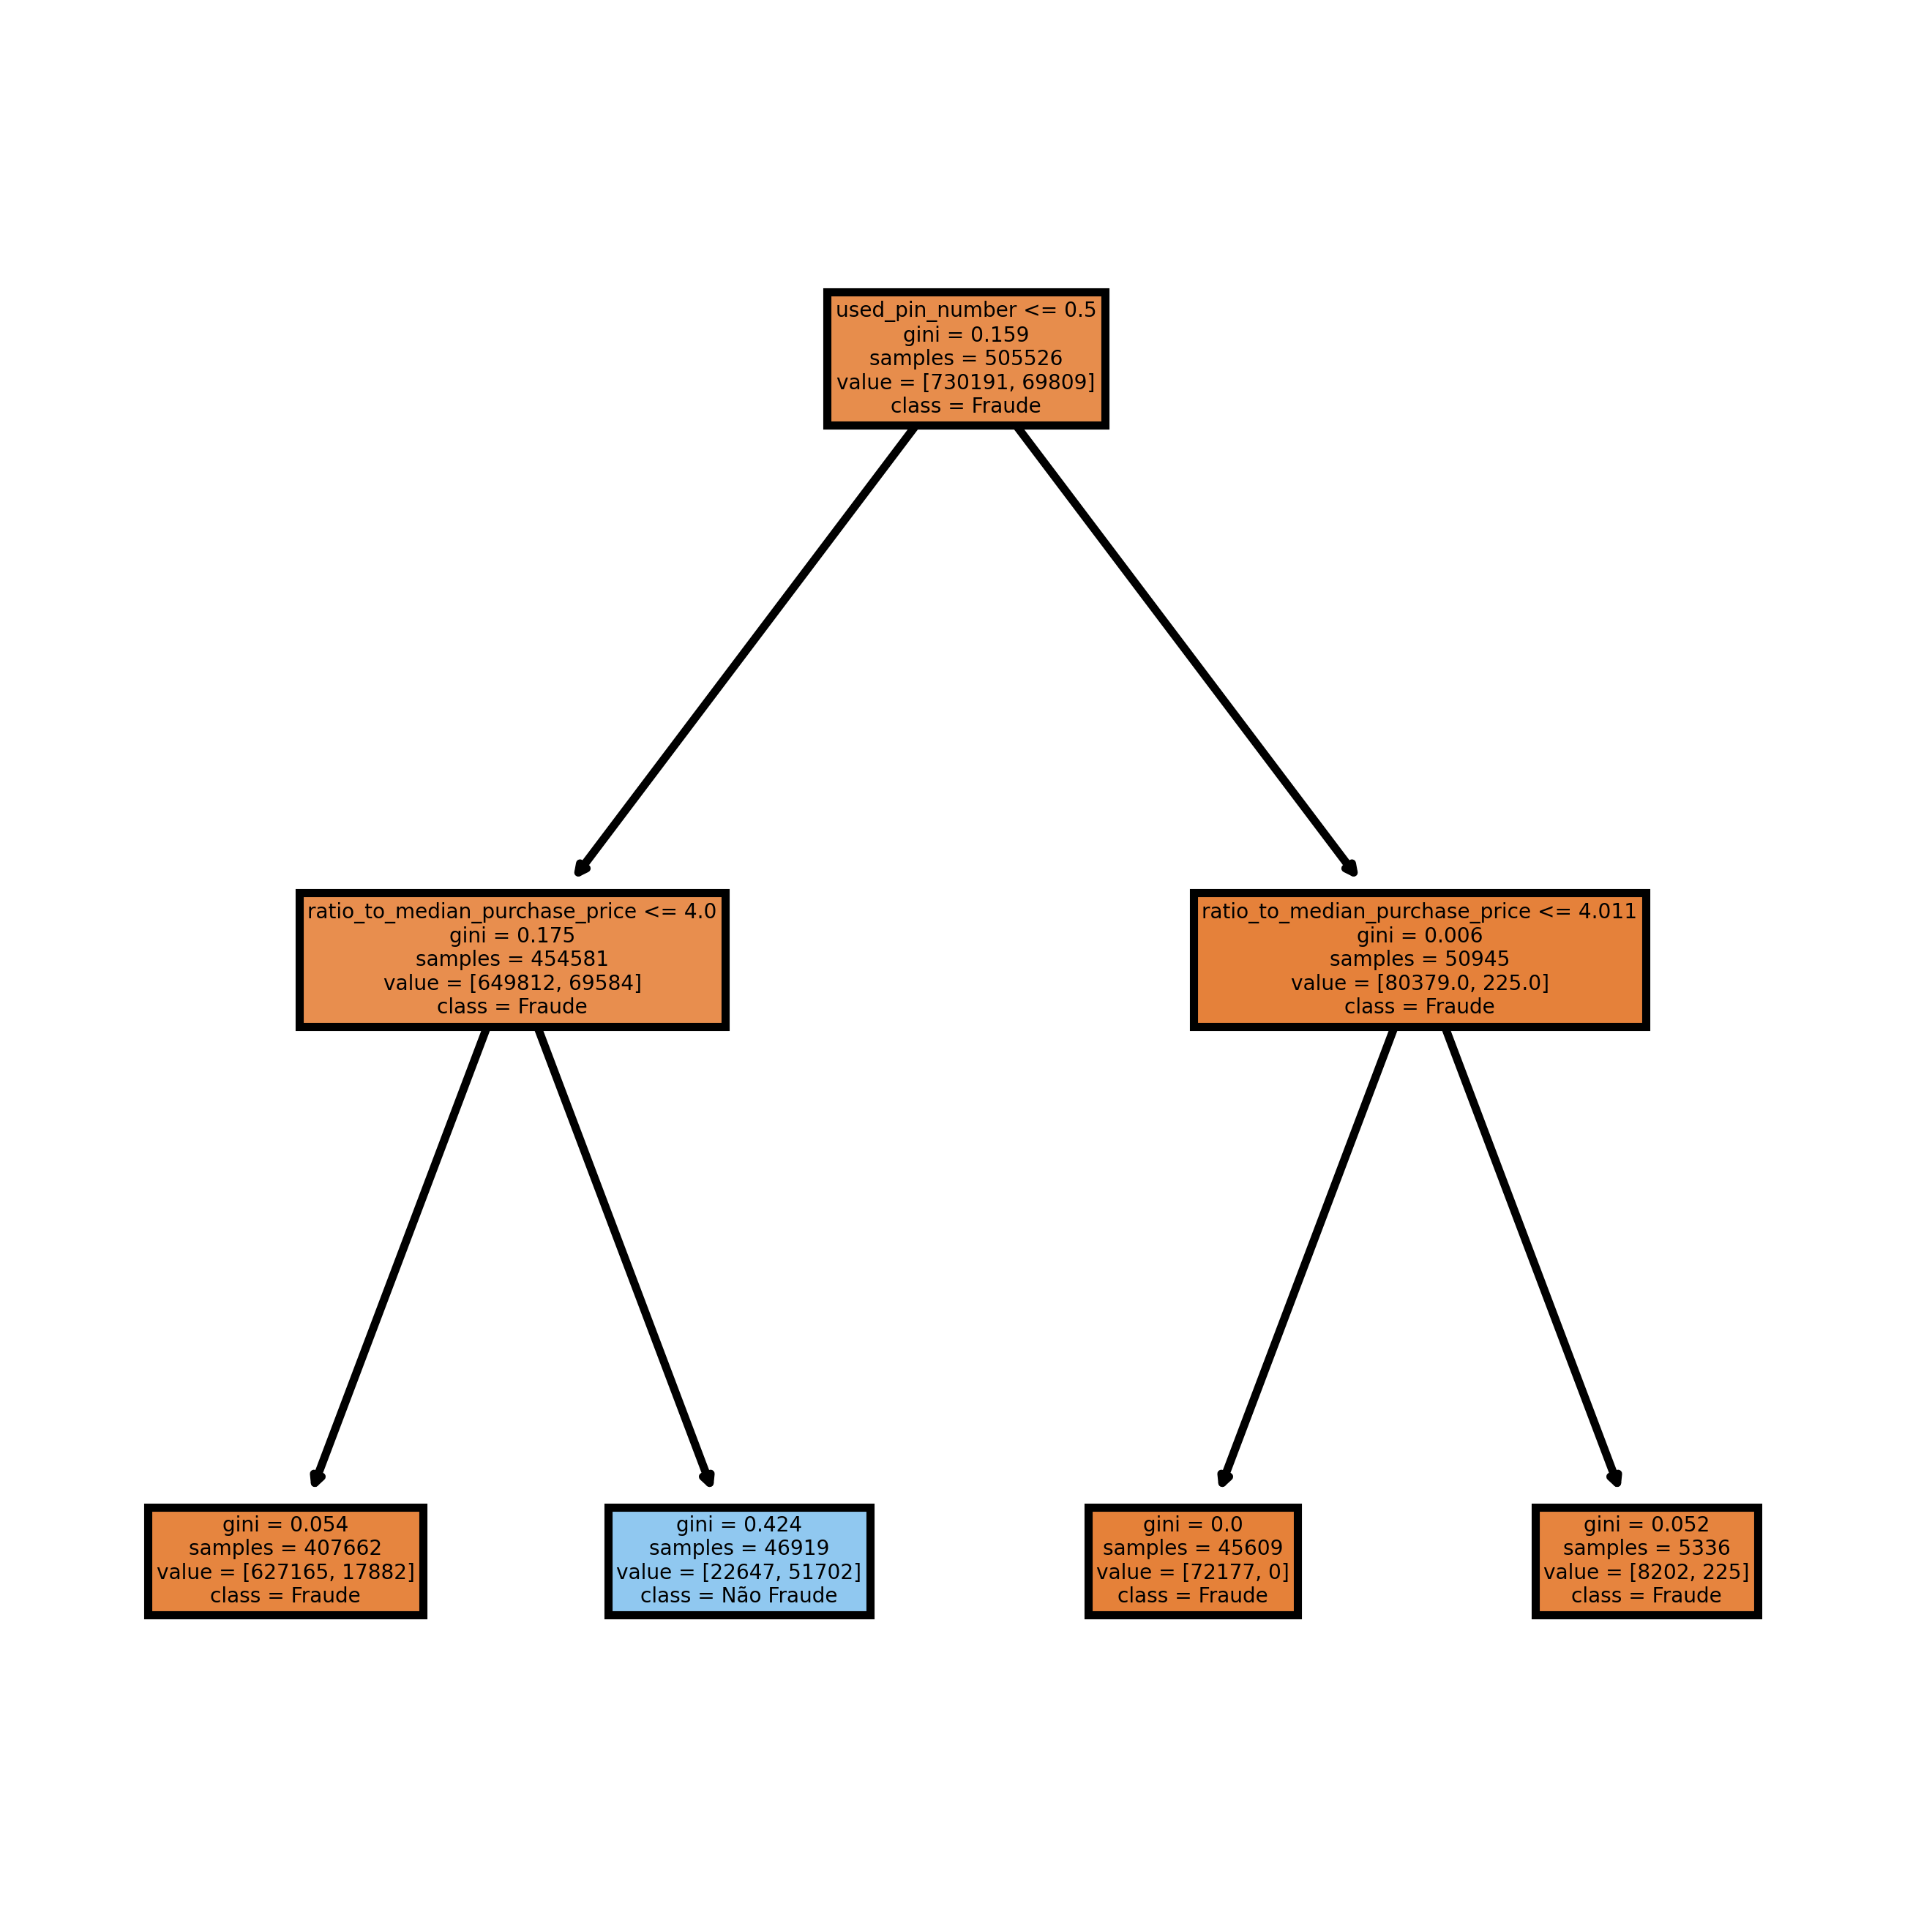

In [18]:
class_names = ['Fraude', 'Não Fraude']
labels_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

fig, ax = plt.subplots(figsize=(4, 4), dpi=800)
tree.plot_tree(estimator[0], feature_names=labels_names, class_names=class_names, filled=True, ax=ax)
fig.savefig(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\image_tree_rf.png')

Plotando todas as árvores geradas

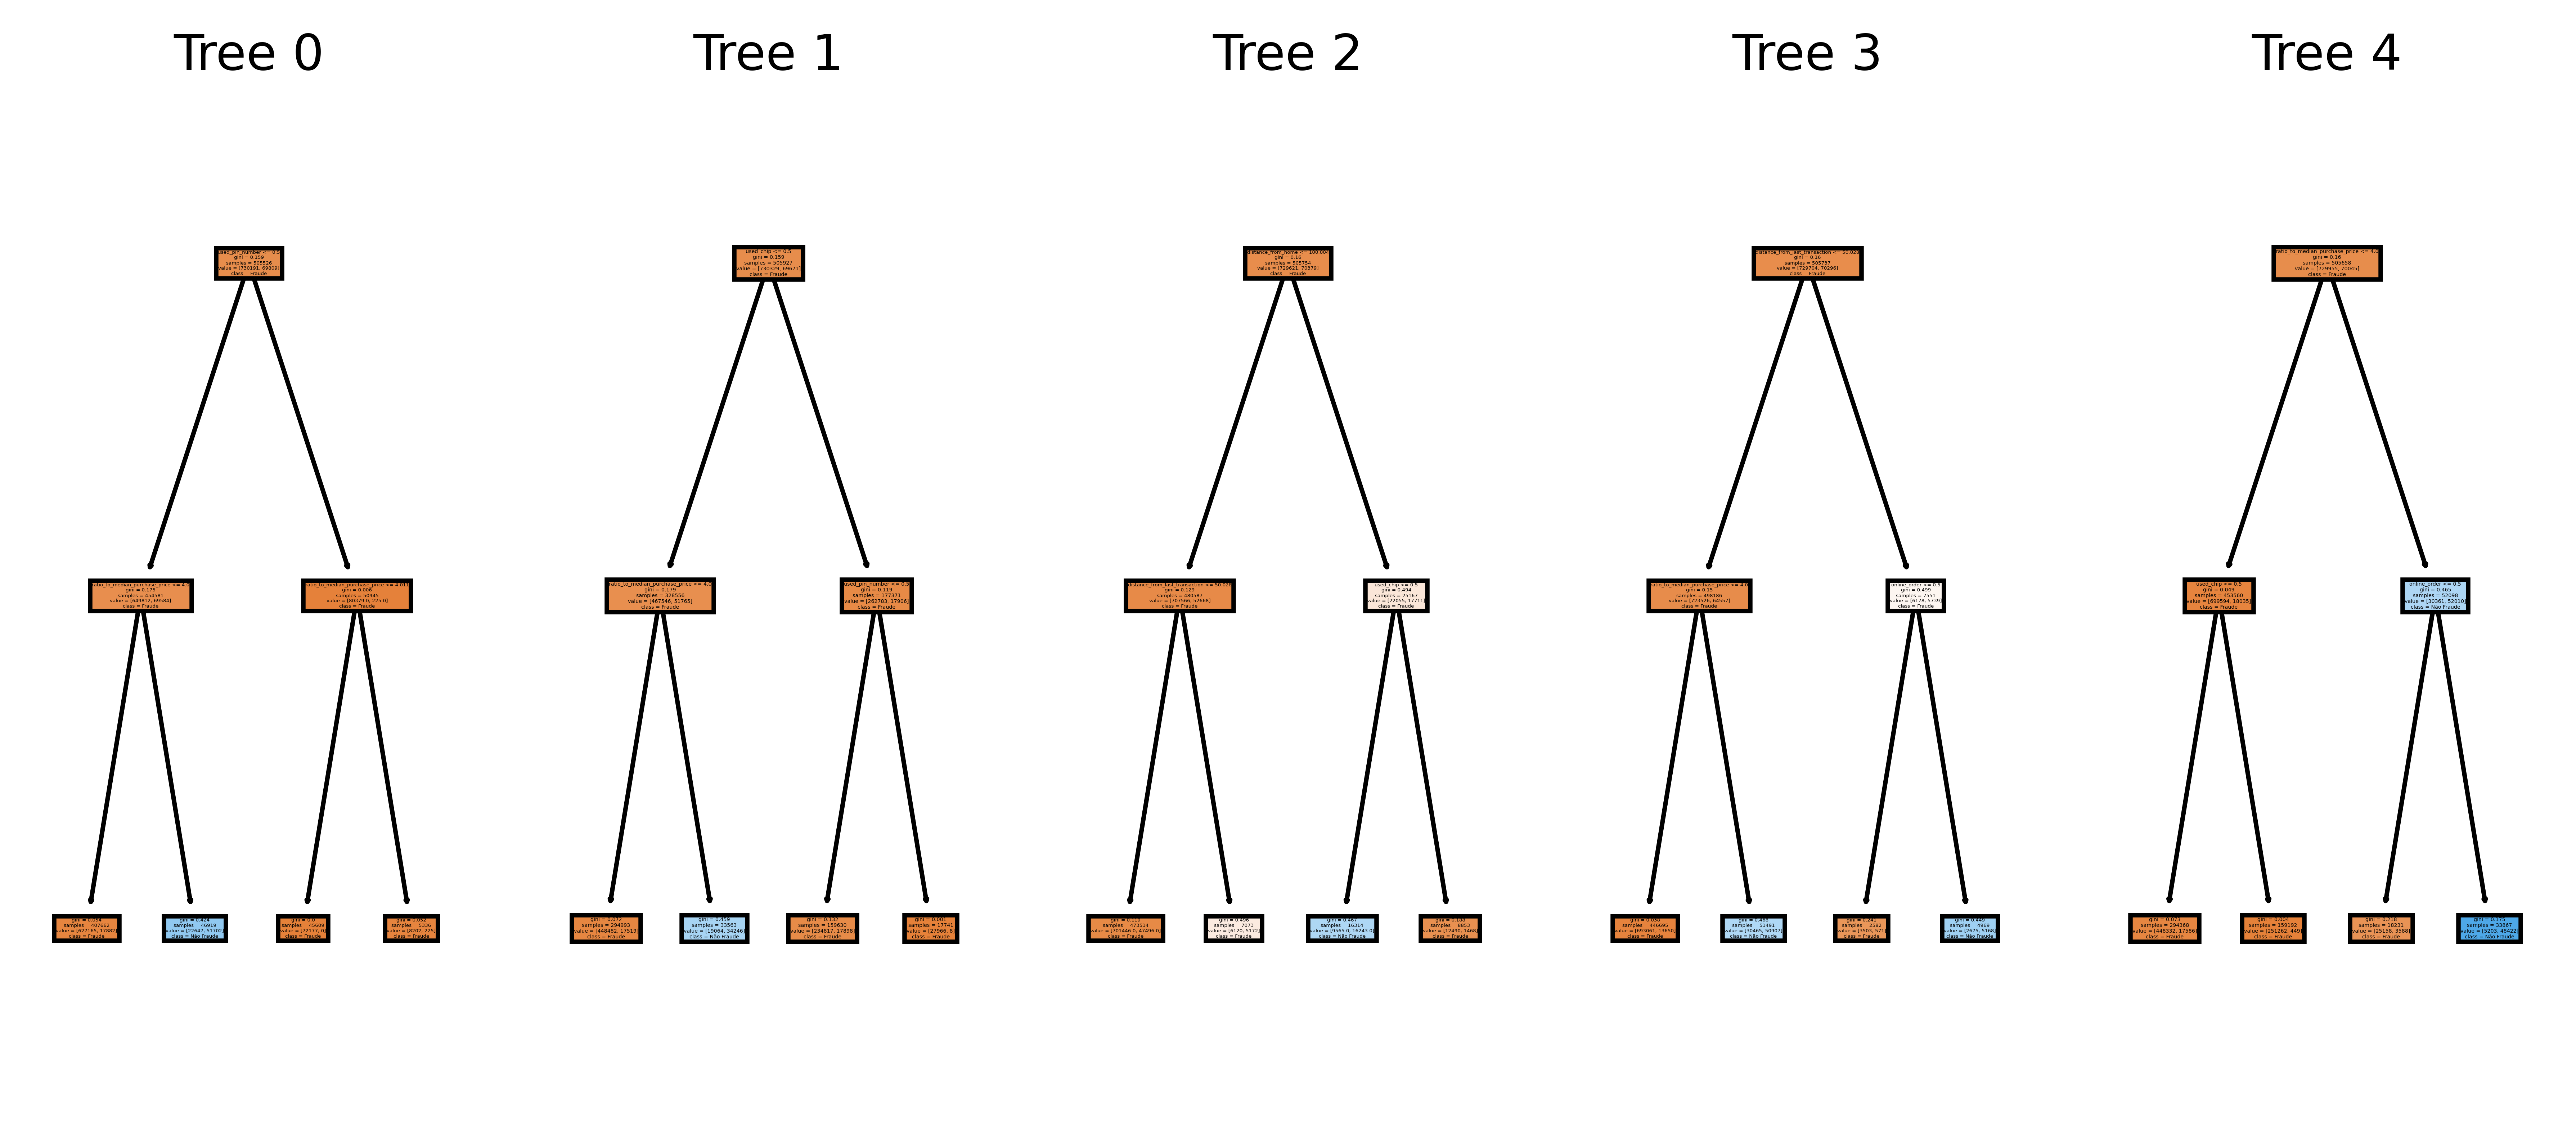

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 4), dpi=900)

for index in range(0, 5):
    tree.plot_tree(estimator[index], feature_names=labels_names, class_names=class_names, filled=True, ax=ax[index])
    ax[index].set_title('Tree ' + str(index), fontsize=11)
fig.savefig(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\image_tree_rf_5.png')

In [22]:
print(rf.score(x_test, y_test))
print(rf.score(x_train, y_train))

0.95339
0.95321875
